In [2]:
%matplotlib inline
import pandas as pd
import os

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
tar = os.chdir("C:\\Users\\xiyan_wang\\Desktop\\mystuff\\PyCon\\pycon-pandas-tutorial-master\\build\\data")
titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [18]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
c = c.groupby(['year','character']).size()
print c
g = c.unstack().fillna(0)
g

year  character
1938  Batman        1
1940  Batman        1
1943  Batman        1
1948  Superman      1
1949  Batman        2
1950  Superman      1
1951  Superman      2
1953  Batman        2
1954  Superman      5
1955  Superman      1
1957  Batman        2
1965  Batman        1
1966  Batman        1
1967  Batman        1
1973  Batman        1
      Superman      2
1978  Superman      2
1980  Superman      2
1981  Batman        1
      Superman      1
1983  Superman      2
1985  Batman        2
      Superman      2
1987  Superman      1
1988  Batman        1
1989  Batman        1
1991  Batman        1
      Superman      1
1992  Batman        1
      Superman      1
                   ..
1997  Superman      1
1998  Batman        1
1999  Batman        1
2002  Batman        1
      Superman      1
2003  Batman        1
      Superman      1
2004  Batman        1
2005  Batman        1
2006  Superman      1
2008  Batman        3
      Superman      2
2009  Batman        3
      Superman  

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0
1951,0.0,2.0
1953,2.0,0.0
1954,0.0,5.0


In [16]:
len(g[g['Batman'] < g['Superman']])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [19]:
len(g[g['Batman'] > g['Superman']])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

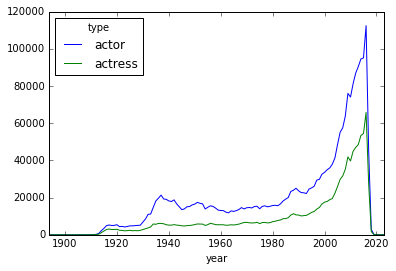

In [23]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

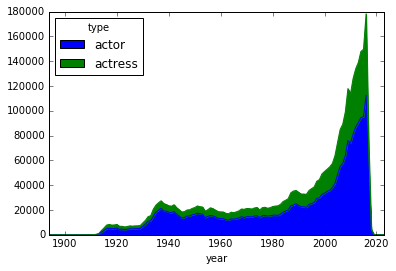

In [25]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [29]:
g = cast.groupby(['year','type']).size().unstack().fillna(0)
g.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


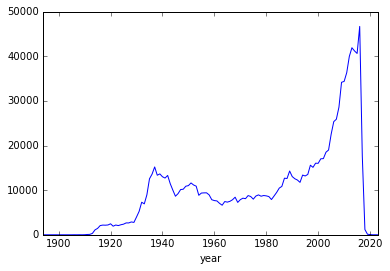

In [34]:
g['diff'] = g.actor - g.actress
g.head()
g['diff'].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [35]:
g['frac'] = g.actor/(g.actor + g.actress)

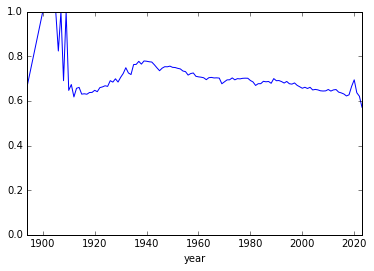

In [37]:
g['frac'].plot(ylim = (0,1))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [40]:
c = cast[cast.n == 2]

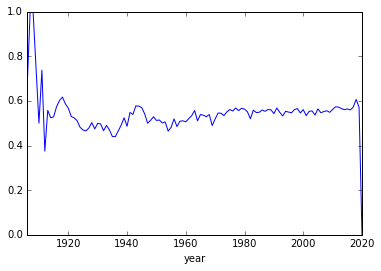

In [43]:
c = c.groupby(['year','type']).size().unstack().fillna(0)
(c.actor/(c.actor + c.actress)).plot(ylim= (0,1))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [55]:
c = cast[cast.n <=3]

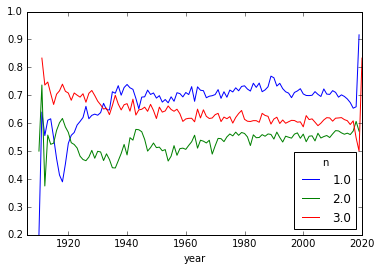

In [67]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot()